In [1]:
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

In [ ]:
weight = 160. 
gain_rate = -1.0 

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
      
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale * (residual/time_step)
    weight = weight + weight_scale * residual
  
    estimates.append(weight)

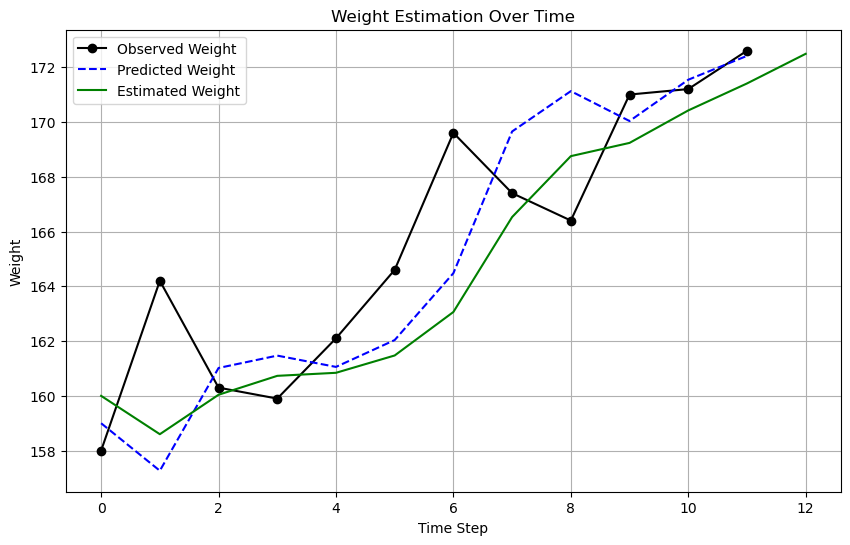

In [4]:
time = list(range(len(weights))) 
time_est = list(range(len(estimates))) 

plt.figure(figsize=(10, 6))
plt.plot(time, weights, 'ko-', label='Observed Weight')
plt.plot(time, predictions, 'b--', label='Predicted Weight')
plt.plot(time_est, estimates, 'g-', label='Estimated Weight')

plt.xlabel('Time Step')
plt.ylabel('Weight')
plt.title('Weight Estimation Over Time')
plt.legend()
plt.grid(True)
plt.show()